# **Analyzing Public Perception of Shell Indonesia’s Brand Reputation During Pertamina's Issues**

# 0. Install Dependencies

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Unggah dataset dari Huggingface
!pip install datasets
!pip install --upgrade datasets fsspec

#  NLP
!pip install Sastrawi
!pip install nltk
import nltk
nltk.download('punkt_tab')

# Sentiment
!pip install transformers
!pip install torch
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 128.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

# 1. Data Understanding

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/PROJECT DATA/Shell Indonesia Brand Reputation Sentiment/shell_brand_reputation_sentiment.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='latin1')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.895350e+18,Fri Feb 28 05:33:31 +0000 2025,16,Mahasiswa Indonesia Ciptakan Mobil Bahan Bakar...,1.895350e+18,https://pbs.twimg.com/ext_tw_video_thumb/18953...,NaN,in,NaN,2,1,4,https://x.com/VIVAcoid/status/1895346573724524883,4.173094e+07,VIVAcoid
1,1.896520e+18,Mon Mar 03 11:04:50 +0000 2025,31560,yang ngoplos : pertamina yang disidak : shell ...,1.896520e+18,NaN,NaN,in,Void,117,127,9340,https://x.com/speedingjunkie/status/1896517117...,1.479380e+18,speedingjunkie
2,1.896820e+18,Tue Mar 04 07:00:00 +0000 2025,27,Terpantau SPBU swasta menaikkan harga beberapa...,1.896820e+18,https://pbs.twimg.com/media/GlHxTa3bkAAF0TV.jpg,NaN,in,Indonesia,1,0,8,https://x.com/GNFI/status/1896817888268267733,3.967770e+07,GNFI
3,1.898500e+18,Sun Mar 09 02:44:17 +0000 2025,4697,@biasalahanakmud Sekedar tambahan; Inilah alas...,1.898570e+18,https://pbs.twimg.com/ext_tw_video_thumb/16275...,biasalahanakmud,in,"Republic of Bashkortostan, Rus",62,36,655,https://x.com/pra_dypta/status/189856547676006...,7.462335e+07,pra_dypta
4,1.897820e+18,Fri Mar 07 01:17:35 +0000 2025,249,Tidak membeli BBM Produk Pertamina bukan berar...,1.897820e+18,https://pbs.twimg.com/media/GlZoNqjbwAUnQ8X.jpg,NaN,in,I N D O N E S I A,8,103,79,https://x.com/Heraloebss/status/18978188792479...,1.251820e+18,Heraloebss


In [ ]:
feature = ['full_text', 'created_at', 'favorite_count', 'quote_count', 'reply_count', 'retweet_count']
df = df[feature]
df.head()

,full_text,created_at,favorite_count,quote_count,reply_count,retweet_count
0,Mahasiswa Indonesia Ciptakan Mobil Bahan Bakar...,Fri Feb 28 05:33:31 +0000 2025,16,2,1,4
1,yang ngoplos : pertamina yang disidak : shell ...,Mon Mar 03 11:04:50 +0000 2025,31560,117,127,9340
2,Terpantau SPBU swasta menaikkan harga beberapa...,Tue Mar 04 07:00:00 +0000 2025,27,1,0,8
3,@biasalahanakmud Sekedar tambahan; Inilah alas...,Sun Mar 09 02:44:17 +0000 2025,4697,62,36,655
4,Tidak membeli BBM Produk Pertamina bukan berar...,Fri Mar 07 01:17:35 +0000 2025,249,8,103,79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_text       215 non-null    object
 1   created_at      215 non-null    object
 2   favorite_count  215 non-null    int64 
 3   quote_count     215 non-null    int64 
 4   reply_count     215 non-null    int64 
 5   retweet_count   215 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.2+ KB


In [ ]:
df.shape

(215, 6)

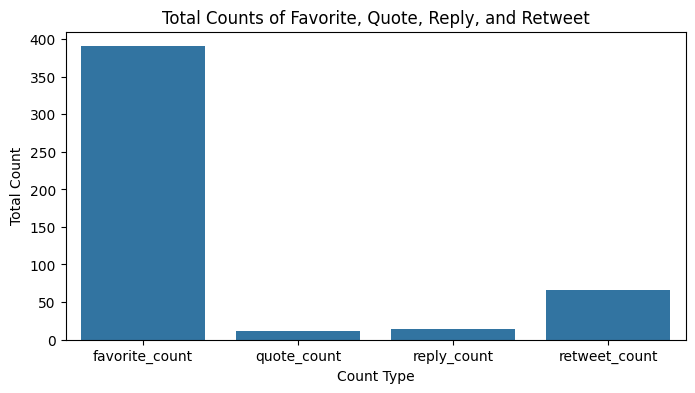

In [ ]:
#  Rata-rata favorit, quote, reply, dan retweet per twit
counts_data = df[['favorite_count', 'quote_count', 'reply_count', 'retweet_count']].mean().reset_index()
counts_data.columns = ['Type', 'Count']

plt.figure(figsize=(8, 4))
sns.barplot(x='Type', y='Count', data=counts_data)
plt.title('Total Counts of Favorite, Quote, Reply, and Retweet')
plt.xlabel('Count Type')
plt.ylabel('Total Count')
plt.show()

# 2. Data Preprocessing

## 2.1. Data Cleaning

In [ ]:
df.isnull().sum()

,0
full_text,0
created_at,0
favorite_count,0
quote_count,0
reply_count,0
retweet_count,0


In [ ]:
# Menghapus baris yang memiliki NaN di kolom 'full_text'
df = df.dropna(subset=['full_text'])

In [ ]:
df[df.duplicated()]

,full_text,created_at,favorite_count,quote_count,reply_count,retweet_count


In [ ]:
# mengubah kolom created_at menjadi datetime

df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at']

,created_at
0,2025-02-28 05:33:31+00:00
1,2025-03-03 11:04:50+00:00
2,2025-03-04 07:00:00+00:00
3,2025-03-09 02:44:17+00:00
4,2025-03-07 01:17:35+00:00
...,...
210,2025-03-18 16:10:49+00:00
211,2025-03-13 11:07:46+00:00
212,2025-03-18 17:51:05+00:00
213,2025-03-18 16:37:58+00:00


In [ ]:
#  transformasi data: hapus character spesial
import string
import re

# Function to clean text: remove special characters and convert to lowercase
def clean_text(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
        text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Remove hashtags
        text = re.sub(r'RT[\s]+', '', text)  # Remove 'RT' (retweet) text
        text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
        text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs (http:// or https://)
        text = re.sub(r'[^a-z\s]', '', text)  # Remove any non-alphabetic characters (including emojis)
        text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # Remove non-alphanumeric characters (already handled above)
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = re.sub(r'(.)\1{2,}(?=\w)', r'\1\1', text)
        text = re.sub(r'(.)\1{1,}\b', r'\1', text)
        text = text.replace('\n', ' ')            # Mengganti baris baru dengan spasi
        text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus semua tanda baca
        text = text.strip(' ')                     # Menghapus spasi berlebih di awal dan akhir teks
    else:
        text = ''  # Handle non-string values (e.g., NaN or float)
    return text

# Menggunakan apply untuk remove special characters
df.loc[:, 'full_text'] = df['full_text'].apply(clean_text)
print(df[['full_text', 'created_at']])

                                             full_text  \
0    mahasiswa indonesia ciptakan mobil bahan bakar...   
1    yang ngoplos pertamina yang disidak shel yang ...   
2    terpantau spbu swasta menaikkan harga beberapa...   
3    sekedar tambahan inilah alasan mengapa shel me...   
4    tidak membeli bbm produk pertamina bukan berar...   
..                                                 ...   
210  siapa ducal ni asal nama macam nama petronas a...   
211  dari tangerang ke grogol sdh lewatin spbu tapi...   
212   bener njir magz kadang ngomong kek kumur cpt bgt   
213     shel dmna mana kosong anjeeng tinggal di gatsu   
214  dear tolong bikin spbu sebanyaknya agar kami p...   

                   created_at  
0   2025-02-28 05:33:31+00:00  
1   2025-03-03 11:04:50+00:00  
2   2025-03-04 07:00:00+00:00  
3   2025-03-09 02:44:17+00:00  
4   2025-03-07 01:17:35+00:00  
..                        ...  
210 2025-03-18 16:10:49+00:00  
211 2025-03-13 11:07:46+00:00  
212 2025-03-18 

In [ ]:
df['full_text']

,full_text
0,mahasiswa indonesia ciptakan mobil bahan bakar...
1,yang ngoplos pertamina yang disidak shel yang ...
2,terpantau spbu swasta menaikkan harga beberapa...
3,sekedar tambahan inilah alasan mengapa shel me...
4,tidak membeli bbm produk pertamina bukan berar...
...,...
210,siapa ducal ni asal nama macam nama petronas a...
211,dari tangerang ke grogol sdh lewatin spbu tapi...
212,bener njir magz kadang ngomong kek kumur cpt bgt
213,shel dmna mana kosong anjeeng tinggal di gatsu


## 2.2. Data Prepare for NLP

In [ ]:
df_nlp = df.copy()

### 2.1. Normalisasi Data

In [ ]:
# Normalization Dictionary
normalization_dict = {
    'alih':'alih',
    'amp': 'sampai',
    'cpt': 'cepat',
    "susahmalas": 'susah malas',
    "pemerintahormas": 'pemerintah ormas',
    "minyak": 'bbm',
    'bahan bakar': 'bbm',
    'bahan bakar minya': 'bbm',
    'bensin': 'bbm',
    'pindah': 'alih',
    "disidak": 'sidak',
    'sudah': 'sudah',
    'sdh': 'sudah',
    'udah': 'sudah',
    'udh': 'sudah',
    'dkt': 'dekat',
    'ud': 'sudah',
    'tingi': 'tinggi',
    'sm': 'dengan',
    'ampe': 'sampai',
    'bnrn': 'beneran',
    'tp': 'tapi',
    'ngerik': 'takut',
    'ngeri': 'takut',
    'antre': 'antri',
    'ngulang': 'ulang',
    'hubungn': 'hubungan',
    'cepetan':'lebih cepat',
    'nungu': 'nunggu',
    'dmna': 'dimana',
    'dmn' : 'dimana',
    'jatim': 'jawa tengah',
    'jateng': 'jawa tengah',
    'shl': 'shell',
    'sell' : 'shell',
    'shel' : 'shell',
    'skrg': 'sekarang',
    'sbg': 'sebagai',
    'gapernah': 'tidak pernah',
    'ngantre': 'antri',
    'apan': 'apa',
    'pls': 'tolong',
    'dlm': 'dalam',
    'tdk': 'tidak',
    'yg': 'yang',
    'lu': 'anda',
    'udh': 'sudah',
    'pd': 'pada',
    'gantri': 'antri',
    'antrean': 'antri',
    'gile': 'gila',
    'bwngsin': 'bensin',
    'bengsin': 'bensin',
    'ak' : 'saya',
    'pengoplosan': 'oplosan',
    'maf' : 'maaf',
    'ngundurin diri': 'mengundurkan diri',
    'dikibulin': 'berbohong',
    'penyefonk': 'pendukung',
    'bm': 'bbm',
    'rp': 'rupiah',
    'ngoplos': 'oplosan',
    'malah': 'justru',
    'knp': 'kenapa',
    'kyk': 'seperti',
    'lg': 'sedang',
    'lgi': 'sedang',
    'pny': 'punya',
    'ayok': 'ayo',
    'indo': 'indonesia',
    'jgn': 'jangan',
    'sdh': 'sudah',
    'bgt': 'banget',
    'kek': 'seperti',
    'tdi': 'tadi',
    'ngak': 'tidak',
    'shel': 'shell',
    'pertamini': 'pertamina',
    'pdhl': 'padahal',
    'gw': 'saya',
    'na': 'nya',
    'w': 'saya',
    'etapi': 'tapi',
    'org': 'orang',
    'drpd': 'daripada',
    'isriwil': 'israel',
    'nyh': 'nya',
    'lbih': 'lebih',
    'bg': 'bang',
    'gk': 'tidak',
    'ga': 'tidak',
    'yg': 'yang',
    'udh': 'sudah',
    'pd': 'pada',
    'gantri': 'ngantri',
    'org2': 'orang-orang',
    'kmu': 'kamu',
    'aku': 'saya',
    'tp': 'tapi',
    'tdk': 'tidak',
    'blm': 'belum',
    'sm': 'sama',
    'jd': 'jadi',
    'dmn': 'dimana',
    'dr': 'dari',
    'sy': 'saya',
    'trs': 'terus',
    'donlod': 'download',
    'tpi': 'tapi',
    'emg': 'memang',
    'bwt': 'buat',
    'y': 'ya',
    'padal': 'padahal',
    'bneran': 'beneran',
    'srius': 'serius',
    'tny': 'tanya',
    'mmg': 'memang',
    'mehasilkan': 'menghasilkan',
    'kirai': 'kirain',
    'sampe': 'sampai',
    'knpa': 'kenapa',
    'ad': 'ada',
    'gin': 'gini',
    'gbalik': 'gabalik',
    'karna': 'karena',
    'gtu': 'gitu',
    'jjur': 'jujur',
    'gmn': 'gimana',
    'bused': 'buset',
    'cma': 'cuma',
    'dpt': 'dapat',
    'pgn': 'pengen',
    'd': 'di',
    'enk': 'enak',
    'utk': 'untuk',
    'psti': 'pasti',
    'skit': 'sakit',
    'bgini': 'begini',
    'btr': 'bentar',
    'kasi': 'kasih',
    'apkh': 'apakah',
    'klu': 'kalau',
    'kl': 'kalau',
    'klo': 'kalau',
    'jga': 'juga',
    'jg': 'juga',
    'skrng': 'sekarang',
    'skrg': 'sekarang',
    'dh': 'sudah',
    'apan': 'apaan',
    'pls': 'please',
    'ntu': 'itu',
    'mehong': 'mahal',
    'gt': 'gitu',
    'kyk': 'kayak',
    'cm': 'cuma',
    'anying': 'anjing',
    'serem': 'seram',
    'blg': 'bilang',
    'ngmg': 'ngomong',
    'brb': 'be right back',
    'btw': 'by the way',
    'lmao': 'laughing my ass off',
    'lol': 'laughing out loud',
    'asap': 'as soon as possible',
    'afk': 'away from keyboard',
    'idk': 'I don’t know',
    'tbh': 'to be honest',
    'imo': 'in my opinion',
    'cmiiw': 'correct me if I am wrong',
    'trnyta': 'ternyata',
    'skli': 'sekali',
    'abis': 'habis',
    'bs': 'bisa',
    'nyari': 'mencari',
    'ribet': 'rumit',
    'doi': 'dia',
    'wkwk': 'haha',
    'ngakak': 'tertawa',
    'lebay': 'berlebihan',
    'sblm': 'sebelum',
    'mendingan': 'lebih baik',
    'mantul': 'mantap betul',
    'ajg': 'anjing',
    'ngga': 'tidak',
    'kaga': 'tidak',
    'kmrn': 'kemarin',
    'brp': 'berapa',
    'bnr': 'benar',
    'ywdh': 'ya sudah',
    'sokap': 'sok akrab',
    'gblk': 'goblok',
    'otw': 'on the way',
    'bt': 'bete',
    'males': 'malas',
    'gabut': 'tidak ada kerjaan',
    'ntr': 'nanti',
    'cpt': 'cepat',
    'ngertiin': 'mengerti',
    'mager': 'malas gerak',
    'keq': 'kayak',
    'plis': 'please',
    'ama': 'sama',
    'lgsng': 'langsung',
    'gpp': 'tidak apa apa',
    'gtg': 'got to go',
    'gini': 'begini',
    'byk': 'banyak',
    'sj': 'saja',
    'soktau': 'sok tahu',
    'ttep': 'tetap',
    'ngilang': 'menghilang',
    'ditinggalin': 'ditinggalkan',
    'sendirian': 'sendiri',
    'sbnrnya': 'sebenarnya',
    'tjd': 'terjadi',
    'km': 'anda',
    'enga' : 'tidak',
    'anjeng': 'anjing',
    'mksd': 'maksud',
    'sepik': 'omong kosong',
    'modusin': 'menggoda',
    'kenalan': 'berkenalan',
    'resek': 'menyebalkan',
    'knapa': 'kenapa',
    'pertemex': 'pertamax',
    'kmna': 'kemana',
    'doi': 'dia',
    'anjeeng': 'anjing',
    'mending': 'lebih baik',
    'seru': 'menyenangkan',
    'auto': 'langsung',
    'ikr': 'i iknow right',
    'kpd': 'kepada',
    'netijen': 'netizen',
    'ri' : 'republik indonesia',
    'swt': 'speechless',
    'capslock jebol': 'emosi',
    'lewatin':'melewati',
    'dtama': 'utama',
    'yadah': 'yaudah',
    'dapetin': 'mendapatkan'
}

In [ ]:
from datasets import load_dataset

# Memuat dataset dari Hugging Face
# dataset = load_dataset('zeroix07/indo-slang-words')
# slang_dict = {entry['text']: entry['text'] for entry in dataset['train']}
# combined_dict = {**normalization_dict, **slang_dict}

dataset = load_dataset('theonlydo/indonesia-slang')
slang_dict = {entry['slang']: entry['formal'] for entry in dataset['train']}
combined_dict = {**normalization_dict, **slang_dict}

# Fungsi untuk normalisasi teks menggunakan kamus gabungan
def normalize_text_combined(text):
    words = text.split()
    words = [combined_dict.get(word, word) for word in words]
    return ' '.join(words)

# Terapkan fungsi normalisasi pada kolom 'full_text'
df_nlp['full_text'] = df_nlp['full_text'].apply(normalize_text_combined)
df_nlp.head()

Repo card metadata block was not found. Setting CardData to empty.


slang-indo.csv:   0%|          | 0.00/65.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4412 [00:00<?, ? examples/s]

,full_text,created_at,favorite_count,quote_count,reply_count,retweet_count
0,mahasiswa indonesia ciptakan mobil bahan bakar...,2025-02-28 05:33:31+00:00,16,2,1,4
1,yang oplosan pertamina yang sidak shell yang i...,2025-03-03 11:04:50+00:00,31560,117,127,9340
2,terpantau spbu swasta menaikkan harga beberapa...,2025-03-04 07:00:00+00:00,27,1,0,8
3,sekedar tambahan inilah alasan mengapa shell m...,2025-03-09 02:44:17+00:00,4697,62,36,655
4,tidak membeli bbm produk pertamina bukan berar...,2025-03-07 01:17:35+00:00,249,8,103,79


In [ ]:
df_nlp = df_nlp[df_nlp['full_text'].str.contains('shell')]

### 2.1. Stopword, Tokenisasi, Stemming

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Inisiasi Stopword Removal
factory_stopword = StopWordRemoverFactory()
stopwords = factory_stopword.get_stop_words()

# Inisiasi Stemmer
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

In [ ]:
# Baca daftar stopword dari URL
stopwords_url = 'https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt'
stopwords_df = pd.read_csv(stopwords_url, header=None, names=['stopword'])
stopwords_list = stopwords_df['stopword'].tolist()

In [ ]:
stopword_manual = ["saya", "gua", "kamu", "dia", "mereka", "den haag", "convert", "adalah", "si", "sih", "ya", "wak", "kan", "deh", "nih", "sih", "dong", "loh", "aja", "tuh", "kucoin", "by way"
                   "wkwk", "wkwkwk", "haha", "hehe", "sm", "jd", "utk", "tp", "bp", "gak", "tidak", "krn", "lg", "btw", "memang", "btwnya", "btwan", "dm", "pm", "link", "lah", "pun", "hah", "nya", "gua", "gw",
                   "loe", "lu", "gue", "kamu", "dia", "mereka", "kita", "kami", "deh", "nih", "dong", "aja", "tuh", "lah", "pun", "hah", "sm", "kayak", "dk", "jd", "sudah", "udah", " ken", ""
                   "utk", "tp", "krn", "lg", "btwnya", "btwan", "njir", "bjir", "jir", "cuy", "duh", "dih", "toh", "ttg", "hq", "hey ansiosa", "hey", "ansiosa"]

stopwords = list(set(stopwords + stopwords_list + stopword_manual))

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Wordcloud
from wordcloud import WordCloud

# Tokenisasi dengan NLTK
def tokenize_text(text):
    return word_tokenize(text)

# Remove Stopword dengan Sastrawi
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopwords]
    result = ' '.join(filtered_tokens)
    return result

# Stemming dengan Sastrawi
def stem_text(text):
    return stemmer.stem(text)

In [ ]:
cols_to_clean = ['full_text']

for col in cols_to_clean:
    # Hapus stopword
    df_nlp[col] = df_nlp[col].apply(remove_stopwords)
    # Stemming
    df_nlp[col] = df_nlp[col].apply(stem_text)
    # Hapus stopword
    df_nlp[col] = df_nlp[col].apply(remove_stopwords)
    # Tokenisasi menggunakan NLTK
    df_nlp[col + '_tokenized'] = df_nlp[col].apply(tokenize_text)

df_nlp.head()

,full_text,created_at,favorite_count,quote_count,reply_count,retweet_count,full_text_tokenized
0,mahasiswa indonesia cipta mobil bahan bakar hi...,2025-02-28 05:33:31+00:00,16,2,1,4,"[mahasiswa, indonesia, cipta, mobil, bahan, ba..."
1,oplos pertamina sidak shell investor asing inv...,2025-03-03 11:04:50+00:00,31560,117,127,9340,"[oplos, pertamina, sidak, shell, investor, asi..."
2,pantau spbu swasta harga bbmnya maret shell vi...,2025-03-04 07:00:00+00:00,27,1,0,8,"[pantau, spbu, swasta, harga, bbmnya, maret, s..."
3,alas shell sop motor motor tangki wajib turun ...,2025-03-09 02:44:17+00:00,4697,62,36,655,"[alas, shell, sop, motor, motor, tangki, wajib..."
4,beli bbm produk pertamina cinta indonesia shel...,2025-03-07 01:17:35+00:00,249,8,103,79,"[beli, bbm, produk, pertamina, cinta, indonesi..."


In [ ]:
# Hapus baris yang memiliki nilai NA
df_nlp = df_nlp.dropna(subset=cols_to_clean)

# Hapus baris yang memiliki string kosong
for col in cols_to_clean:
    df_nlp = df_nlp[df_nlp[col].str.strip() != ""]

df_nlp.head()

,full_text,created_at,favorite_count,quote_count,reply_count,retweet_count,full_text_tokenized
0,mahasiswa indonesia cipta mobil bahan bakar hi...,2025-02-28 05:33:31+00:00,16,2,1,4,"[mahasiswa, indonesia, cipta, mobil, bahan, ba..."
1,oplos pertamina sidak shell investor asing inv...,2025-03-03 11:04:50+00:00,31560,117,127,9340,"[oplos, pertamina, sidak, shell, investor, asi..."
2,pantau spbu swasta harga bbmnya maret shell vi...,2025-03-04 07:00:00+00:00,27,1,0,8,"[pantau, spbu, swasta, harga, bbmnya, maret, s..."
3,alas shell sop motor motor tangki wajib turun ...,2025-03-09 02:44:17+00:00,4697,62,36,655,"[alas, shell, sop, motor, motor, tangki, wajib..."
4,beli bbm produk pertamina cinta indonesia shel...,2025-03-07 01:17:35+00:00,249,8,103,79,"[beli, bbm, produk, pertamina, cinta, indonesi..."


In [ ]:
df_nlp.head()

,full_text,created_at,favorite_count,quote_count,reply_count,retweet_count,full_text_tokenized
0,mahasiswa indonesia cipta mobil bahan bakar hi...,2025-02-28 05:33:31+00:00,16,2,1,4,"[mahasiswa, indonesia, cipta, mobil, bahan, ba..."
1,oplos pertamina sidak shell investor asing inv...,2025-03-03 11:04:50+00:00,31560,117,127,9340,"[oplos, pertamina, sidak, shell, investor, asi..."
2,pantau spbu swasta harga bbmnya maret shell vi...,2025-03-04 07:00:00+00:00,27,1,0,8,"[pantau, spbu, swasta, harga, bbmnya, maret, s..."
3,alas shell sop motor motor tangki wajib turun ...,2025-03-09 02:44:17+00:00,4697,62,36,655,"[alas, shell, sop, motor, motor, tangki, wajib..."
4,beli bbm produk pertamina cinta indonesia shel...,2025-03-07 01:17:35+00:00,249,8,103,79,"[beli, bbm, produk, pertamina, cinta, indonesi..."


# 3. Analisis Berdasarkan Waktu

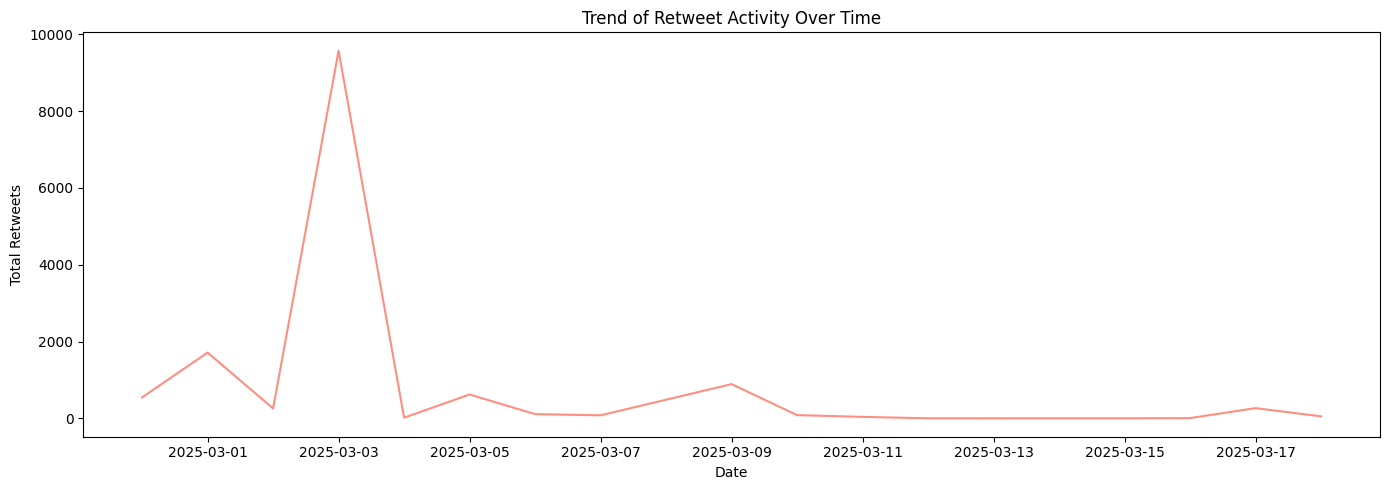

In [ ]:
df_time = df.copy()

df_time['date'] = df_time['created_at'].dt.date
retweets_per_day = df_time.groupby('date')['retweet_count'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=retweets_per_day, x='date', y='retweet_count', color='#FF8E80')
plt.title('Trend of Retweet Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Retweets')
plt.tight_layout()
plt.show()

In [ ]:
min_date = df['created_at'].min()
max_date = df['created_at'].max()

print(f"Rentang waktu data: dari {min_date.date()} hingga {max_date.date()}")
print(f"Tanggal terawal: {min_date}")
print(f"Tanggal terakhir: {max_date}")

Rentang waktu data: dari 2025-02-28 hingga 2025-03-18
Tanggal terawal: 2025-02-28 01:07:40+00:00
Tanggal terakhir: 2025-03-18 23:41:26+00:00


# 3. Analisis Wordcloud & Most Frequent Words

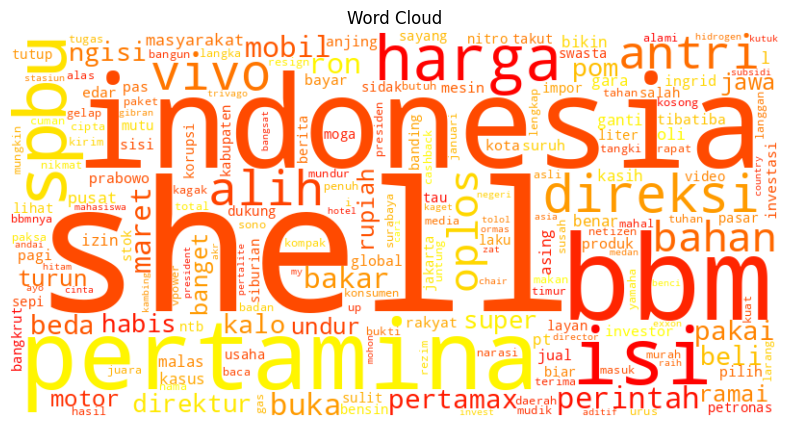

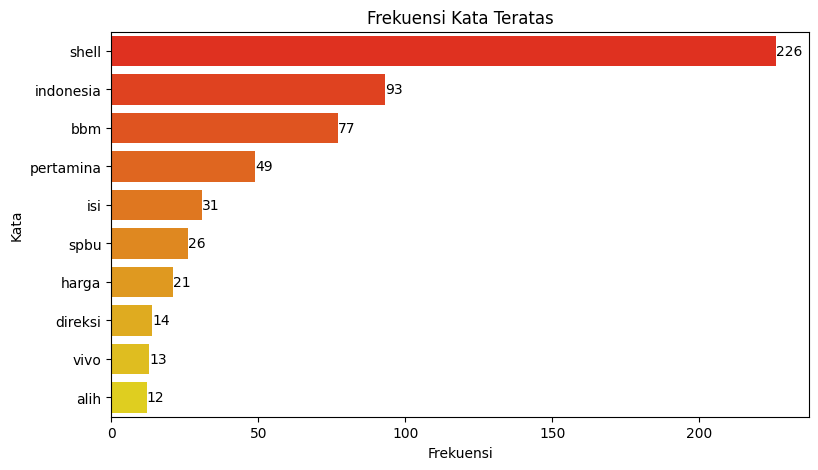

In [ ]:
tokens = df_nlp["full_text_tokenized"].sum()

freq = FreqDist(tokens)

# buat word cloud dari frekuensi token
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate_from_frequencies(freq)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

# Plot frekuensi kata teratas
top_10 = freq.most_common(10)
words = [word for word, count in top_10]
counts = [count for word, count in top_10]

plt.figure(figsize=(9, 5))
ax = sns.barplot(x=counts, y=words, palette='autumn')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title("Frekuensi Kata Teratas")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

# 4. Sentiment Analysis

## Sentimen Berdasarkan Entitas "Shell"

In [ ]:
from transformers import pipeline
from tqdm import tqdm

# zero-shot classification model
classifier = pipeline("zero-shot-classification", model="joeddav/xlm-roberta-large-xnli")
tqdm.pandas()

# analisis sentimen terhadap spesifik entity
def analyze_target_sentiment(text, target="Shell"):
    try:
        labels = [
            f"positive towards {target}",
            f"negative towards {target}",
            f"neutral towards {target}"
        ]
        result = classifier(text, candidate_labels=labels)
        top_label = result['labels'][0]
        top_score = result['scores'][0]
        return top_label.replace(f" towards {target}", ""), top_score
    except Exception as e:
        print(f"Error untuk teks: {text}, Error: {e}")
        return "ERROR", 0.0


df_nlp[['shell_sentiment', 'shell_score']] = df_nlp['full_text'].progress_apply(lambda x: pd.Series(analyze_target_sentiment(x, target="Shell")))

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu
100%|██████████| 184/184 [03:55<00:00,  1.28s/it]


In [ ]:
pd.set_option('display.max_colwidth', None)
df_nlp[['full_text', 'shell_sentiment', 'shell_score']].head(20)

,full_text,shell_sentiment,shell_score
0,mahasiswa indonesia cipta mobil bahan bakar hidrogen raih juara qatar pecah rekor asia mahasiswa universitas indonesia ui hasil cipta cipta mobil hidrogen raih juara shell eco marathon,positive,0.455862
1,oplos pertamina sidak shell investor asing invest indonesia perintah bikin investor asing susah malas investasi indonesia perintah ormas hotel trivago,negative,0.965369
2,pantau spbu swasta harga bbmnya maret shell vivo kompak harga bbm ron rprp liter bbm ron harga kompak kerek rupiah liter pertamina tahan harga bbm ron,positive,0.434329
3,alas shell sop motor motor tangki wajib turun isi bbm,negative,0.934527
4,beli bbm produk pertamina cinta indonesia shell vivo exxon mobil samasama bayar pajak indonesia,positive,0.957834
5,shell kompak harga bbm maret,positive,0.495942
6,bubar pertamina biar shell petronas jual bbm indonesia desember,negative,0.640764
7,breaking harga bbm maret kendara instagram my shell,positive,0.648185
8,ron mungkin ron pertamax pakai zat addictive value ingrid siburian presdir pt shell mobility indonesia pertamina,positive,0.821560
9,konsumen shell benci banget perintah indonesia konoha ac shell masuk indonesia tolol perintah pertamina direksi korup nan bangsat moga turun kutuk turun unles terima yesus tuhan,negative,0.991718


In [ ]:
shell_colors = ['#FF5000', '#FFA900', '#FFFF80']

sentiment_counts = df_nlp['shell_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = px.pie(sentiment_counts,
             names='Sentiment',
             values='Count',
             hole=0.4,
             title="Shell Brand Sentiment Distribution",
             color='Sentiment',
             color_discrete_sequence=shell_colors)

fig.update_traces(textinfo='label+percent',
                  insidetextorientation='radial')

fig.update_layout(title={'x':0.5, 'y':0.95, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

## Emotion Classification

In [ ]:
classifier = pipeline("text-classification", model="StevenLimcorn/indonesian-roberta-base-emotion-classifier")

def classify_emotion(text):
    try:
        result = classifier(text)
        return result[0]['label']
    except Exception as e:
        print(f"Error classifying emotion for text: {text}, Error: {e}")
        return "ERROR"

tqdm.pandas()
df_nlp['emotion_label'] = df_nlp['full_text'].progress_apply(classify_emotion)

config.json:   0%|          | 0.00/988 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
100%|██████████| 184/184 [00:15<00:00, 11.68it/s]


In [ ]:
from transformers import pipeline
from nltk import sent_tokenize
import pandas as pd
from tqdm import tqdm
import plotly.express as px
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Load classifier
classifier = pipeline("text-classification", model="StevenLimcorn/indonesian-roberta-base-emotion-classifier")


def classify_emotion_by_sentence(text):
    results = []
    sentences = sent_tokenize(text)

    for sentence in sentences:
        brands_in_sentence = []
        if 'pertamina' in sentence.lower():
            brands_in_sentence.append('Pertamina')
        if 'shell' in sentence.lower():
            brands_in_sentence.append('Shell')

        if brands_in_sentence:
            emotion = classify_emotion(sentence)  # fungsi klasifikasi emosi per kalimat
            for brand in brands_in_sentence:
                results.append({'Brand': brand, 'Emotion': emotion})
    return results

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Device set to use cpu


In [ ]:
tqdm.pandas()
df_nlp['brand_emotions'] = df_nlp['full_text'].progress_apply(classify_emotion_by_sentence)

# Flatten
emotion_data = []
for row in df_nlp['brand_emotions']:
    for item in row:
        emotion_data.append(item)

df_emotion = pd.DataFrame(emotion_data)

# Hitung distribusi
emotion_counts = df_emotion.groupby(['Brand', 'Emotion']).size().reset_index(name='Count')

100%|██████████| 184/184 [00:15<00:00, 11.80it/s]


In [ ]:
emotion_color_map = {
    'love': '#FFFF00',
    'happy': '#FFD700',
    'sadness': '#FFA500',
    'anger': '#FF6347',
    'fear': '#FFD580'
}

fig = px.pie(emotion_counts,
             names='Emotion',
             values='Count',
             hole=0.4,
             title="Emotion Distribution per Brand",
             color='Emotion',
             color_discrete_map=emotion_color_map,
             facet_col='Brand')

fig.update_traces(textinfo='label+percent',
                  insidetextorientation='radial')

fig.update_layout(title={'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

Versi Barchart

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pertamina_df = emotion_counts[emotion_counts['Brand'] == 'Pertamina'].sort_values(by='Count', ascending=True)
shell_df = emotion_counts[emotion_counts['Brand'] == 'Shell'].sort_values(by='Count', ascending=True)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Pertamina", "Shell"),
    shared_yaxes=False
)

# Pertamina bar chart
fig.add_trace(go.Bar(
    x=pertamina_df['Count'],
    y=pertamina_df['Emotion'],
    orientation='h',
    marker_color='#EF3E36',
    text=pertamina_df['Count'],
    textposition='outside',
    name='Pertamina'
), row=1, col=1)

# Shell bar chart
fig.add_trace(go.Bar(
    x=shell_df['Count'],
    y=shell_df['Emotion'],
    orientation='h',
    marker_color='#FFD700',
    text=shell_df['Count'],
    textposition='outside',
    name='Shell'
), row=1, col=2)

fig.update_layout(
    title_text="Emotion Distribution per Brand",
    title_x=0.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    height=400,
    width=1200
)

fig.show()

In [ ]:
df_nlp[['full_text','shell_sentiment', 'emotion_label', 'brand_emotions']].sample(5)

,full_text,shell_sentiment,emotion_label,brand_emotions
10,shell indonesia sulit urus izin impor bbm salah langka bbm spbu timbul sulit shell urus izin impor bbm indikasi monopoli industri bbm indonesia,negative,anger,"[{'Brand': 'Shell', 'Emotion': 'anger'}]"
86,shell kilang indonesia iya indonesia merdeka shell kilang kalimantan,positive,anger,"[{'Brand': 'Shell', 'Emotion': 'anger'}]"
126,ujung adab etika ngikut indonesia gelap bangga pakai shell,positive,anger,"[{'Brand': 'Shell', 'Emotion': 'anger'}]"
29,harga bbm spbu indonesia maret pertamina dex turun rupiah l dexlite rupiah l bbm bbm shell shell super rupiah l,positive,sadness,"[{'Brand': 'Pertamina', 'Emotion': 'sadness'}, {'Brand': 'Shell', 'Emotion': 'sadness'}]"
103,setia pertamina support local brand semenjak sorry sayang but i moved shell and they re better setia kualitas simple got money i got a good products,positive,love,"[{'Brand': 'Pertamina', 'Emotion': 'love'}, {'Brand': 'Shell', 'Emotion': 'love'}]"


## Topic Modeling Berdasarkan Emotion

In [ ]:
!pip install bertopic
!pip install transformers
!pip install sentence_transformers
import transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import MaximalMarginalRelevance

def extract_texts_by_emotion_and_brand(df, brand, emotion):
    texts = []
    for idx, row in df.iterrows():
        brand_emotions = row['brand_emotions']
        if isinstance(brand_emotions, list):
            # Cek apakah ada dict dengan Brand == brand dan Emotion == emotion
            for be in brand_emotions:
                if isinstance(be, dict):
                    if be.get('Brand') == brand and be.get('Emotion') == emotion:
                        if isinstance(row['full_text'], str):
                            texts.append(row['full_text'])
                        else:
                            print(f"Warning: full_text bukan string di index {idx}")
                        break  # setelah ketemu, skip cek dict lain
    return texts



def run_topic_modeling_for_shell_emotion(df, emotion, stopwords):
    # Ambil teks dengan emosi tertentu untuk Shell
    texts = extract_texts_by_emotion_and_brand(df, brand="Shell", emotion=emotion)

    if len(texts) < 0:
        print(f"Tidak cukup data untuk emosi '{emotion}' (hanya {len(texts)} teks).")
        return None, None
    # Embedding
    embedding_model = SentenceTransformer("indobenchmark/indobert-base-p1")
    embeddings = embedding_model.encode(texts, show_progress_bar=True)

    # Topic modeling pipeline
    umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.1, metric='cosine', random_state=0)
    hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=3, metric='euclidean', cluster_selection_method='eom')
    vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=1, ngram_range=(1, 2))
    representation_model = MaximalMarginalRelevance(diversity=0.6)

    topic_model = BERTopic(
        embedding_model=embedding_model,
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        vectorizer_model=vectorizer_model,
        representation_model=representation_model,
        top_n_words=10,
        verbose=True
    )

    topics, probs = topic_model.fit_transform(texts, embeddings)
    topic_info = topic_model.get_topic_info()

    return topic_model, topic_info

In [ ]:
topic_model_anger, info_anger = run_topic_modeling_for_shell_emotion(df_nlp, "anger", stopwords)
topic_model_anger.get_topic_info()

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-05-17 10:05:29,144 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-17 10:05:39,616 - BERTopic - Dimensionality - Completed ✓
2025-05-17 10:05:39,617 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-17 10:05:39,625 - BERTopic - Cluster - Completed ✓
2025-05-17 10:05:39,632 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-17 10:05:42,992 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,19,-1_shell indonesia_kasih_beda_bbm shell,"[shell indonesia, kasih, beda, bbm shell, pt, prabowo gibran, truth, ingrid siburian, berita, petronas]","[kaget besok shell kasus perintah jajar salah cari kambing hitam pertamina cuman maaf cerita direksi shell ngundurin pertamina salah kocak indonesia, pt pertamina patra niaga benar laku tipu konsumen jaksa agung blending tolak ru jaksa presiden direktur country chair shell indonesia ingrid siburian cecar salah, prabowo nikmat bbm oplos bbm sampah produk pertamina prabowo isi bbm shell guling prabowo gibran rakyat bohong prabowo gibran jokowi aguan bebas tohindonesia jajah oligarki]"
1,0,26,0_bbm shell_oli mesin_isi bbm_beli,"[bbm shell, oli mesin, isi bbm, beli, ngisi, kagak, masyarakat indonesia, motor, mesin shell, ganti oli]","[rabu isi bbm sepi pagi isi bbm ramai antri motor mobil awal isi bbm shell bayar tunai nominal bulat benar dikembaliin nominal, batas sob ganti oli mesin nikmat paket service oli mesin shell chemical paket tune up oli mesin shell paket ganti oli mesin oli mesin shell, pertamina bangsat gara skandal korupsi bikin antri isi bbm shell e antri gin anjing ngular menit anjing cuman isi bbm doang iya telat soale jarang motor]"
2,1,25,1_oplos_direktur_impor bbm_investor asing,"[oplos, direktur, impor bbm, investor asing, spbu shell, indonesia shell, alih, pertamina sidak, bbm pertamax, video]","[ramai isu oplos bbm pertamax masyarakat kecewa pilih alih pertamina spbu shell, oplos pertamina sidak shell investor asing invest indonesia perintah bikin investor asing susah malas investasi indonesia perintah ormas hotel trivago mission impossible final reckoning, oplos pertamina sidak shell investor asing invest indonesia perintah bikin investor asing susah malas investasi indonesia perintah ormas hotel trivago]"
3,2,10,2_shell kilang_demand izin_coba buka_indonesia iya,"[shell kilang, demand izin, coba buka, indonesia iya, hati paksa, anjing gatsu, beda shell, bal shell, up demand, stay bal]","[motuba alih shell super shell power, jakarta isi shell stay bal hati paksa merah shell, shell kilang indonesia iya indonesia merdeka shell kilang kalimantan]"
4,3,7,3_shell buka_shell global_adab etika_alas efisiensi,"[shell buka, shell global, adab etika, alas efisiensi, ujung adab, spbu swasta, ayo petisi, bikin blunder, clickbait shell, daerah indonesia]","[ujung adab etika ngikut indonesia gelap bangga pakai shell, ayo petisi spbu swasta shell vivo armada daerah indonesia, clickbait shell global netizen indonesia alas efisiensi pimpin]"
5,4,7,4_grocery bayar_arah bhp_area bodetabek_kawung tunggu,"[grocery bayar, arah bhp, area bodetabek, kawung tunggu, bahasa indonesia, bandung nitro, bayar bil, bbm petronas, bbm beli, buka ngincer]","[maklum tutup stesen bbm petronas mcdonald rampr genting sempah kerjakerja selenggara tarikh mac alternatif stesen bbm shell arah bhp arah antan, bahasa indonesia binance temu langgar market maker tangan goplus security gps myshel shell market maker keluar platform larang aktivitas untung sita dana ganti rugi, total spending min rm nak cashback rm kena spend rmkgt isi bbm beli barang shell online spend ning grocery bayar bil je by way ringgitplus sign up gift rmk weh apply kat]"


In [ ]:
fig = topic_model_anger.visualize_barchart(
    top_n_topics=5,
    n_words=5,
    title="Anger Topics",
    width=400
)
fig.show()

In [ ]:
topic_model_sadness, info_sadness = run_topic_modeling_for_shell_emotion(df_nlp, "sadness", stopwords)
topic_model_sadness.get_topic_info()

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-05-17 10:05:49,412 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-17 10:05:49,478 - BERTopic - Dimensionality - Completed ✓
2025-05-17 10:05:49,479 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-17 10:05:49,484 - BERTopic - Cluster - Completed ✓
2025-05-17 10:05:49,488 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-17 10:05:52,933 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,11,-1_shell indonesia_naturalisasi_bbm spbu_ngefek signifikan,"[shell indonesia, naturalisasi, bbm spbu, ngefek signifikan, ngisi shell, never fil, olaagawa munyankole, olaagawa, pertamina again, salido raizen]","[jawa sisi timur pas golek alasane opo jawa blas sono akhire nemu jawa timur shell jaring spbu luas kotakota surabaya malang ekspansi dukung, ganti pertamina shell somehow ngefek signifikan banget hemat gas halus ngisi shell habis demandgtsupply supply limit edar but one thing for sure il never fil my tank with pertamina again, estan donde vos viste que xom raizen otra ku ahora recuerdo estan buscando comprador salir del pais shell dek hecho habia salido raizen compro los activos hace unos aos]"
1,0,14,0_rupiah_harga bbm_bahan bakar_bbm bbm,"[rupiah, harga bbm, bahan bakar, bbm bbm, shell super, harga bahan, beda, bakar bbm, pertamina shell, bbm spbu]","[harga bahan bakar bbm bbm nilai oktan ron pertamax stasiun isi bahan bakar spbu pertamina shell vivo alami, harga bbm shell super shell vpower maret pertamina turun harga shell indonesia harga bahan bakar bbm bbm shell super patok rupiah liter februari rupiah liter, maret stasiun isi bahan bakar spbu indonesia laku harga bahan bakar bbm bbm ringkas banding harga bbm spbu pertamina shell akr vivo]"
2,1,7,1_haccp on_badan mutu_on site_site pt,"[haccp on, badan mutu, on site, site pt, indonesia lombok, live shell, laksana surveilans, indonesia shell, lombok barat, maret inspektur]","[shell global kawankawan shell indonesia, maret inspektur mutu badan mutu kkp ntb laksana surveilans haccp on site pt live shell indonesia lombok barat ntb, maret inspektur mutu badan mutu kkp ntb laksana surveilans haccp on site pt live shell indonesia lombok barat ntb]"
3,2,6,2_direksi_undur direksi_direktur shell_ganti shell,"[direksi, undur direksi, direktur shell, ganti shell, hasil racun, shell resmi, ombak direksi, resmi undur, racun ganti, undur ombak]","[direksi shell tibatiba undur, direksi shell tibatiba undur, direksi shell tibatiba undur]"
4,3,6,3_shell sepi_hahaha please_gaees saia_beli kang,"[shell sepi, hahaha please, gaees saia, beli kang, biar shell, buka shell, daerah paksa, dobel antri, bola gaees, jelek motor]","[gara gara pertamina shell sepi rame suka shell sepi, sayang banget kabupaten shell kalo alih paksa pertamina sedih banget kasih bahan bakar jelek motor sayang, buka shell mini mini daerahdaerah go portable jemput bola gaees saia prihatin warga daerah paksa beli kang oplos]"
5,4,6,4_shell shell_abis shell_kucing jaga_jaga rindu,"[shell shell, abis shell, kucing jaga, jaga rindu, rindu pom, mng trn, trn shell, tikus kucing, surabaya abis, pom shell]","[rindu pom shell, mng trn shell, shell tikus kucing jaga]"


In [ ]:
fig = topic_model_sadness.visualize_barchart(
    top_n_topics=5,
    n_words=5,
    title="Sadness Topics",
    width=400
)
fig.show()

In [ ]:
topic_model_happy, info_happy = run_topic_modeling_for_shell_emotion(df_nlp, "happy", stopwords)
topic_model_happy.get_topic_info()

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-05-17 10:05:56,582 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-17 10:05:56,629 - BERTopic - Dimensionality - Completed ✓
2025-05-17 10:05:56,629 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-17 10:05:56,634 - BERTopic - Cluster - Completed ✓
2025-05-17 10:05:56,636 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-17 10:05:59,021 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,5,-1_isi shell_pagi isi_google mapsnya_badaag plus,"[isi shell, pagi isi, google mapsnya, badaag plus, bela beli, cakap pagi, blitar cakap, best seller, ingrid, dpr republik]","[kabupaten shell juang baca review google mapsnya tulungagung bela beli shell blitar, cakap pagi isi shell selamat pagi isi shell kak sadar penuh tau kak best seller, ingrid siburian shell indonesia president director country chair zat aditif bahan bakar ron ron rapat komisi dpr republik indonesia senayan jakarta]"
1,0,17,0_cipta mobil_enduro challenge_hidrogen raih_pilih pelihara,"[cipta mobil, enduro challenge, hidrogen raih, pilih pelihara, mahasiswa, raih juara, yamaha enduro, baca guys, bakat indonesia, camat guys]","[malu pakai shell shell sponsor atlet bakat indonesia juara dunia balap karting nama chairul latief, pacu adrenalin yamaha enduro challenge cinta offroad yamaha wr event shell blu cru yamaha enduro challenge hadir, mahasiswa indonesia cipta mobil bahan bakar hidrogen raih juara qatar pecah rekor asia mahasiswa universitas indonesia ui hasil cipta cipta mobil hidrogen raih juara shell eco marathon]"
2,1,6,1_harga bbm_kompak_bbm bbm_bbmnya,"[harga bbm, kompak, bbm bbm, bbmnya, bakar bbm, pt, bahan bakar, telegram resmi, alami ubah, bbm maret]","[video mobil maung garuda warna putih presiden prabowo subianto isi bahan bakar bbm bbm spbu usaha shell edar media sosial, awal maret badan usaha sedia bahan bakar bbm bbm shell indonesia bpakr hingga pt vivo energy indonesia harga produk bbmnya pt pertamina persero alami ubah, pantau spbu swasta harga bbmnya maret shell vivo kompak harga bbm ron rprp liter bbm ron harga kompak kerek rupiah liter pertamina tahan harga bbm ron]"
3,2,6,2_ajaib mudik_bbm nyala_bojongsoang bensin_bbm cecer,"[ajaib mudik, bbm nyala, bojongsoang bensin, bbm cecer, aman indikator, bensin ready, bilang terima, cashback rupiah, cikini habis, covid landa]","[untung ngisi shell aman indikator bbm nyala tangki kapasitas l isi ful l l, kaget lihat staf shell kelap lembut bbm cecer tangki motor mbak bilang terima kasih moga sehat covid landa kalimat kuat pagi shell puja kerang ajaib, mudik tenang cashback jalan nikmat jalan mudik nyaman isi bbm spbu shell pakai mandiri kartu kredit cashback rupiah laku maret februari cashbacknya cek informasi lengkap]"


In [ ]:
# fig = topic_model_happy.visualize_barchart(
#     top_n_topics=5,
#     n_words=5,
#     title="Happy Topics",
#     width=400
# )
# fig.show()

## Bertopic General

In [ ]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import MaximalMarginalRelevance
from sentence_transformers import SentenceTransformer

In [ ]:
df_topmol = df_nlp.copy()

In [ ]:
df_topmol = df_topmol.reset_index(drop=True)
data_topmol = df_topmol['full_text']

embedding_model = SentenceTransformer("indobenchmark/indobert-base-p1")
embeddings = embedding_model .encode(data_topmol, show_progress_bar=True)
print(embeddings[:5])

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

[[-0.41257146  0.44917223 -0.00808456 ...  0.7212831  -0.18837073
  -0.5529688 ]
 [-0.08896199  0.41225207  0.68160987 ...  1.3536001  -0.7278786
  -0.65183777]
 [-0.5964529   1.6657888   0.44283885 ...  1.7487222  -0.17116636
  -0.919184  ]
 [ 0.79479784  0.54471165  1.1461726  ...  1.0435797  -0.63559693
  -1.0322498 ]
 [-0.56945544  0.9979435   0.83427346 ...  1.2332821  -0.3779912
  -0.40557355]]


In [ ]:
umap_model = UMAP(n_neighbors=20, n_components=5, min_dist=0.05, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=3, ngram_range=(1, 2))
representation_model = MaximalMarginalRelevance(diversity=0.7)

In [ ]:
topic_model = BERTopic(
    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=10,
    verbose=True
)

In [ ]:
topics, probs = topic_model.fit_transform(data_topmol, embeddings)
topic_model.get_topic_info()

2025-05-17 10:06:11,830 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-17 10:06:12,199 - BERTopic - Dimensionality - Completed ✓
2025-05-17 10:06:12,200 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-17 10:06:12,209 - BERTopic - Cluster - Completed ✓
2025-05-17 10:06:12,212 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-17 10:06:14,076 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,48,-1_indonesia_bbm shell_direksi shell_isi bbm,"[indonesia, bbm shell, direksi shell, isi bbm, berita, kasih, beli, beda, buka shell, surabaya]","[maret inspektur mutu badan mutu kkp ntb laksana surveilans haccp on site pt live shell indonesia lombok barat ntb, kisah shell indonesia era kolonial mula sumur bbm sumatera, shell plc induk shell indonesia direksi pusat resign shell indonesia teliti]"
1,0,60,0_indonesia_bahan_bahan bakar_oplos,"[indonesia, bahan, bahan bakar, oplos, pertamina shell, beda, bbm shell, alih shell, isi bbm, super]","[istana krisis percaya pertamina mobil istana isi bbm spbu shell tuju indonesia gelap kesini sono, maret stasiun isi bahan bakar spbu indonesia laku harga bahan bakar bbm bbm ringkas banding harga bbm spbu pertamina shell akr vivo, awal maret badan usaha sedia bahan bakar bbm bbm shell indonesia bpakr hingga pt vivo energy indonesia harga produk bbmnya pt pertamina persero alami ubah]"
2,1,40,1_isi_bbm shell_isi bbm_turun,"[isi, bbm shell, isi bbm, turun, alih, dukung, kabupaten, super shell, bayar, malas]","[rabu isi bbm sepi pagi isi bbm ramai antri motor mobil awal isi bbm shell bayar tunai nominal bulat benar dikembaliin nominal, isi bbm shell ibu sabar klakson pas operator layan beli dibalesin operator suruh alih pertamina mah suruh mahal biar antri suruh murah, pertamina bangsat gara skandal korupsi bikin antri isi bbm shell e antri gin anjing ngular menit anjing cuman isi bbm doang iya telat soale jarang motor]"
3,2,36,2_indonesia shell_petronas_surabaya_shell buka,"[indonesia shell, petronas, surabaya, shell buka, untung, pom shell, berita, dukung, shell super, alih shell]","[baca guys hubung shell indonesia, andai shell indonesia, shell global kawankawan shell indonesia]"


In [ ]:
fig = topic_model.visualize_barchart(
    top_n_topics=5,
    n_words=10,
    title="Topic Word Scores",
    width=400
)

fig.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Preprocessing teks (menghapus stopwords dan tokenisasi)
def preprocess(text):
    return text.lower()

# Terapkan preprocessing pada df_topmol['full_text']
texts = df_topmol['full_text'].apply(preprocess).tolist()

# Vektorisasi teks dengan TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Membuat model NMF
nmf_model = NMF(n_components=4, random_state=42)
nmf_topics = nmf_model.fit_transform(X)

# Menampilkan topik-topik yang ditemukan
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(nmf_model.components_):
    print(f"Topik {idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Menampilkan 10 kata teratas dari topik


Topik 0:
['pusat', 'direktur', 'andai', 'habis', 'berita', 'beda', 'buka', 'global', 'indonesia', 'shell']
Topik 1:
['kasus', 'resmi', 'ombak', 'mundur', 'pusat', 'direktur', 'shell', 'direksi', 'tibatiba', 'undur']
Topik 2:
['pertamina', 'kompak', 'rupiah', 'bahan', 'bakar', 'vivo', 'maret', 'spbu', 'bbm', 'harga']
Topik 3:
['pilih', 'masyarakat', 'antri', 'oplos', 'ramai', 'pertamax', 'alih', 'pertamina', 'isi', 'bbm']


## Sentiment Wordcloud

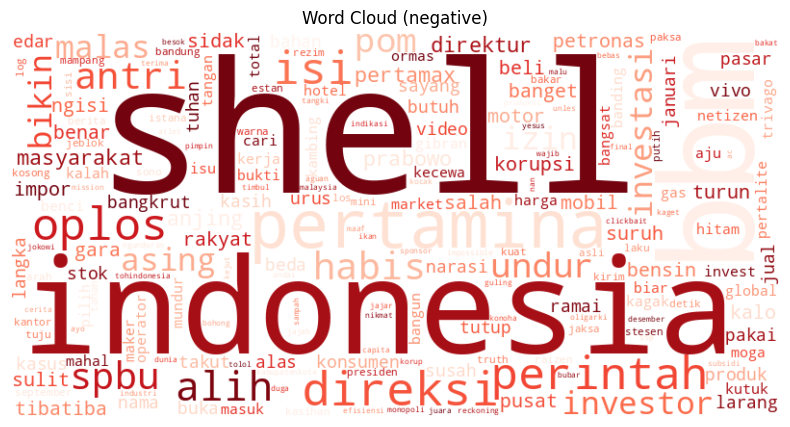

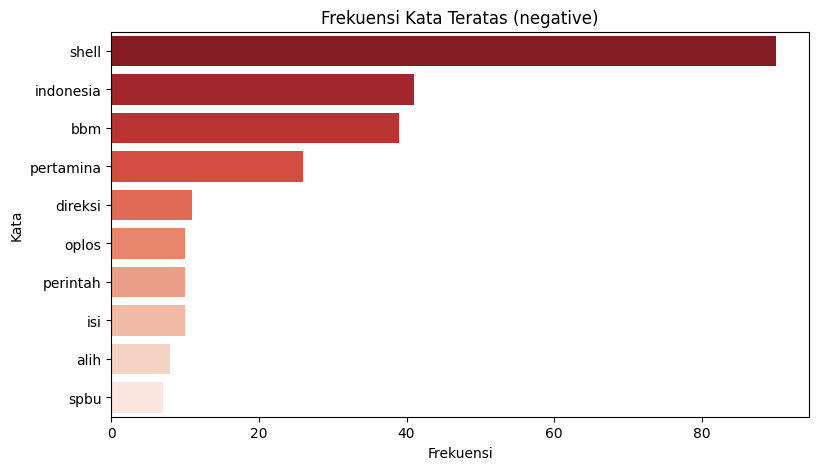

Data untuk sentimen 'neutral' kosong, tidak dapat membuat wordcloud dan bar chart.


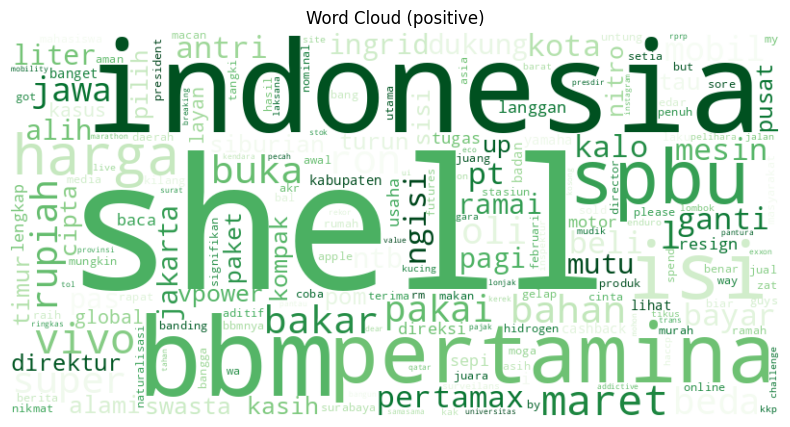

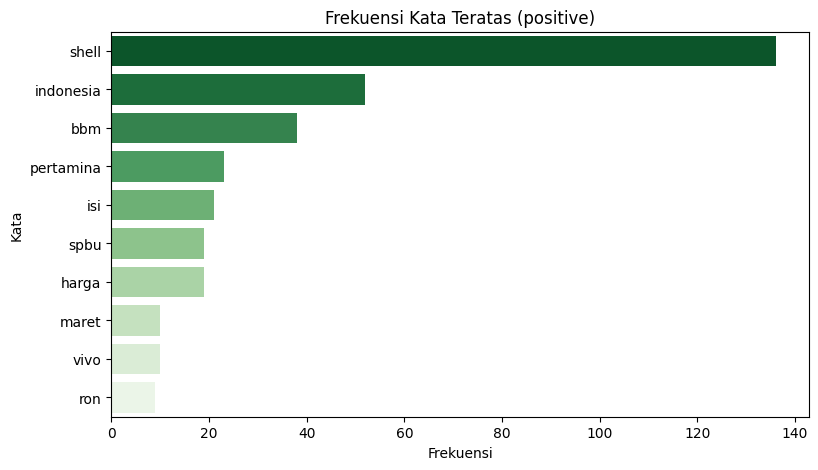

In [ ]:
from wordcloud import WordCloud
from nltk.probability import FreqDist

df_nlp["full_text_tokenized"] = df_nlp["full_text_tokenized"].apply(
    lambda x: x if isinstance(x, list) else [])

stopwords_custom = ['cuman', 'aja']
df_nlp["full_text_tokenized"] = df_nlp["full_text_tokenized"].apply(
    lambda tokens: [word for word in tokens if word not in stopwords_custom])

# pisahkan data berdasarkan sentimen
negative_df = df_nlp[df_nlp["shell_sentiment"] == "negative"]
neutral_df = df_nlp[df_nlp["shell_sentiment"] == "neutral"]
positive_df = df_nlp[df_nlp["shell_sentiment"] == "positive"]

def create_wordcloud_and_barchart(df, shell_sentiment):
    tokens = []
    for item in df["full_text_tokenized"]:
        if isinstance(item, list):
            tokens.extend(item)

    freq = FreqDist(tokens)

    if len(freq) == 0:
        print(f"Data untuk sentimen '{shell_sentiment}' kosong, tidak dapat membuat wordcloud dan bar chart.")
        return

    # colormap berdasarkan sentimen
    if shell_sentiment == "negative":
        color = "Reds"
    elif shell_sentiment == "neutral":
        color = "Greys"
    else:
        color = "Greens"

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate_from_frequencies(freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud ({shell_sentiment})")
    plt.show()

    # Top 10 words
    top_10 = freq.most_common(10)
    words = [word for word, count in top_10]
    counts = [count for word, count in top_10]

    plt.figure(figsize=(9, 5))
    ax = sns.barplot(x=counts, y=words, palette=color + "_r")
    plt.title(f"Frekuensi Kata Teratas ({shell_sentiment})")
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")
    plt.show()

# Jalankan untuk tiap sentimen
create_wordcloud_and_barchart(negative_df, "negative")
create_wordcloud_and_barchart(neutral_df, "neutral")
create_wordcloud_and_barchart(positive_df, "positive")